In [54]:
pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

In [55]:
import gym
import gym_anytrading

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import DQN,HER

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [56]:
df=pd.read_csv('AAPL (2).csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-01,47.910000,47.919998,47.095001,47.810001,46.552612,111448000
1,2019-04-02,47.772499,48.615002,47.762501,48.505001,47.229336,91062800
2,2019-04-03,48.312500,49.125000,48.287498,48.837502,47.553089,93087200
3,2019-04-04,48.697498,49.092499,48.285000,48.922501,47.635853,76457200
4,2019-04-05,49.112499,49.275002,48.982498,49.250000,47.954746,74106400


In [57]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [58]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes
df.sort_values('Date',ascending=True,inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-01,47.910000,47.919998,47.095001,47.810001,46.552612,111448000
1,2019-04-02,47.772499,48.615002,47.762501,48.505001,47.229336,91062800
2,2019-04-03,48.312500,49.125000,48.287498,48.837502,47.553089,93087200
3,2019-04-04,48.697498,49.092499,48.285000,48.922501,47.635853,76457200
4,2019-04-05,49.112499,49.275002,48.982498,49.250000,47.954746,74106400


In [59]:
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-01,47.910000,47.919998,47.095001,47.810001,46.552612,111448000
2019-04-02,47.772499,48.615002,47.762501,48.505001,47.229336,91062800
2019-04-03,48.312500,49.125000,48.287498,48.837502,47.553089,93087200
2019-04-04,48.697498,49.092499,48.285000,48.922501,47.635853,76457200
2019-04-05,49.112499,49.275002,48.982498,49.250000,47.954746,74106400


In [60]:
!pip install finta

In [61]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [62]:
df['SMA']=TA.SMA(df,12)
df['RSI']=TA.RSI(df)
df['EMA']=TA.EMA(df)
df['STOCH']=TA.STOCH(df)
df['SMM']=TA.SMM(df)
df['ADX']=TA.ADX(df)
df['SSMA']=TA.SSMA(df)
df['AveragePrice']=(df['Low']+df['High'])/2



In [63]:
mean=df['AveragePrice'].mean()

In [64]:
df.fillna(0,inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,EMA,STOCH,SMM,ADX,SSMA,AveragePrice
Date,,,,,,,,,,,,,,
2019-04-01,47.910000,47.919998,47.095001,47.810001,46.552612,111448000,0.0,0.0,47.810001,0.0,0.0,0.0,47.810001,47.507500
2019-04-02,47.772499,48.615002,47.762501,48.505001,47.229336,91062800,0.0,100.0,48.196112,0.0,0.0,0.0,48.177942,48.188751
2019-04-03,48.312500,49.125000,48.287498,48.837502,47.553089,93087200,0.0,100.0,48.458977,0.0,0.0,0.0,48.424137,48.706249
2019-04-04,48.697498,49.092499,48.285000,48.922501,47.635853,76457200,0.0,100.0,48.615997,0.0,0.0,0.0,48.571524,48.688750
2019-04-05,49.112499,49.275002,48.982498,49.250000,47.954746,74106400,0.0,100.0,48.804599,0.0,0.0,0.0,48.740904,49.128750


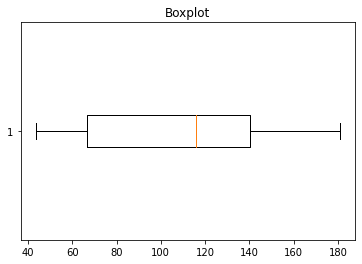

In [65]:
_=plt.boxplot(df.AveragePrice,vert=False)
_=plt.title('Boxplot')

In [66]:
q_low = df["AveragePrice"].quantile(0.01)
q_hi  = df["AveragePrice"].quantile(0.99)

df_filtered = df[(df["AveragePrice"] < q_hi) & (df["AveragePrice"] > q_low)]

In [67]:
def add_signals(env):
  start=env.frame_bound[0]-env.window_size
  end=env.frame_bound[1]
  prices=env.df.loc[:,'AveragePrice'].to_numpy()[start:end]
  signal_features=env.df.loc[:,['AveragePrice','Volume','SMA','RSI','EMA','STOCH','SMM','ADX','SSMA']].to_numpy()[start:end]
  return prices,signal_features


In [68]:
class MyCustomEnv(StocksEnv):
  _process_data=add_signals

env2=MyCustomEnv(df=df,window_size=12,frame_bound=(12,300))

In [69]:
env2.prices

array([47.5074995, 48.1887515, 48.706249 , 48.6887495, 49.12875  ,
       49.571249 , 50.2600005, 49.8649995, 49.9300005, 49.543751 ,
       49.7325005, 49.991249 , 50.2487505, 50.8337495, 50.91     ,
       51.456249 , 51.94125  , 51.609999 , 50.8899995, 51.22875  ,
       50.313749 , 53.067499 , 52.5974995, 52.758749 , 51.5424995,
       51.03125  , 50.8862495, 49.7924995, 48.9525015, 46.5412505,
       46.88875  , 47.2212505, 47.6637495, 47.2074985, 45.578751 ,
       46.5874995, 46.0325015, 44.7937485, 45.0949995, 44.8125   ,
       44.418751 , 44.4874995, 44.122501 , 43.5237505, 44.2937505,
       45.7662505, 45.952499 , 47.2112505, 48.373749 , 48.700001 ,
       48.67     , 48.79875  , 47.98625  , 48.391251 , 49.4375   ,
       49.64875  , 49.83     , 49.875    , 49.7912505, 49.3187485,
       49.7925015, 50.142502 , 49.5687505, 50.6424995, 50.5612505,
       50.891251 , 50.997499 , 49.9762495, 50.039999 , 50.661249 ,
       50.762501 , 50.7749995, 51.2337495, 51.20125  , 51.045 

In [70]:
print("env2 information:")
print("> shape:", env2.shape)
print("> df.shape:", env2.df.shape)
print("> prices.shape:", env2.prices.shape)
print("> signal_features.shape:", env2.signal_features.shape)
print("> max_possible_profit:", env2.max_possible_profit())

env2 information:
> shape: (12, 9)
> df.shape: (758, 14)
> prices.shape: (300,)
> signal_features.shape: (300, 9)
> max_possible_profit: 8.49464557615683


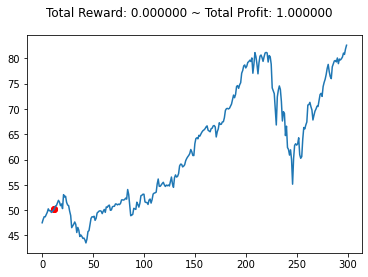

In [71]:
env2.reset()
env2.render()

In [72]:
env2.prices

array([47.5074995, 48.1887515, 48.706249 , 48.6887495, 49.12875  ,
       49.571249 , 50.2600005, 49.8649995, 49.9300005, 49.543751 ,
       49.7325005, 49.991249 , 50.2487505, 50.8337495, 50.91     ,
       51.456249 , 51.94125  , 51.609999 , 50.8899995, 51.22875  ,
       50.313749 , 53.067499 , 52.5974995, 52.758749 , 51.5424995,
       51.03125  , 50.8862495, 49.7924995, 48.9525015, 46.5412505,
       46.88875  , 47.2212505, 47.6637495, 47.2074985, 45.578751 ,
       46.5874995, 46.0325015, 44.7937485, 45.0949995, 44.8125   ,
       44.418751 , 44.4874995, 44.122501 , 43.5237505, 44.2937505,
       45.7662505, 45.952499 , 47.2112505, 48.373749 , 48.700001 ,
       48.67     , 48.79875  , 47.98625  , 48.391251 , 49.4375   ,
       49.64875  , 49.83     , 49.875    , 49.7912505, 49.3187485,
       49.7925015, 50.142502 , 49.5687505, 50.6424995, 50.5612505,
       50.891251 , 50.997499 , 49.9762495, 50.039999 , 50.661249 ,
       50.762501 , 50.7749995, 51.2337495, 51.20125  , 51.045 

In [73]:
env2.signal_features

array([[4.75074995e+01, 1.11448000e+08, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.78100010e+01],
       [4.81887515e+01, 9.10628000e+07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.81779422e+01],
       [4.87062490e+01, 9.30872000e+07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.84241373e+01],
       ...,
       [8.07999995e+01, 8.75604000e+07, 7.98285429e+01, ...,
        7.97225040e+01, 4.04317896e+01, 7.88663602e+01],
       [8.18725015e+01, 1.37250400e+08, 8.02110426e+01, ...,
        8.04625020e+01, 4.14690567e+01, 7.93117647e+01],
       [8.26150020e+01, 9.56544000e+07, 8.05075005e+01, ...,
        8.05800020e+01, 4.26140490e+01, 7.97621239e+01]])

info {'total_reward': 20.08624850000004, 'total_profit': 0.4738357739767207, 'position': 0}


<function matplotlib.pyplot.show>

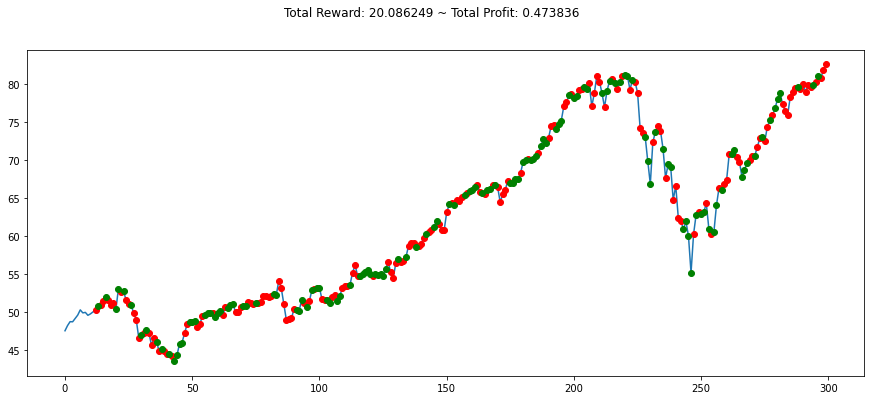

In [74]:
state=env2.reset()
while True:
  action=env2.action_space.sample()
  n_state,reward,done,info=env2.step(action)
  if done:
    print("info",info)
    break
plt.figure(figsize=(15,6))
plt.cla()
env2.render_all()
plt.show    

In [75]:
env_maker=lambda: env2
env=DummyVecEnv([env_maker])

In [76]:
model=DQN('LnMlpPolicy',env,verbose=1)
model.learn(total_timesteps=200000)

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 100      |
| mean 100 episode reward | 7.3      |
| steps                   | 28413    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 200      |
| mean 100 episode reward | 3.4      |
| steps                   | 57113    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 300      |
| mean 100 episode reward | 2.6      |
| steps                   | 85813    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 400      |
| mean 100 episode reward | 5.5      |
| steps                   | 114513   |
--------------------------------------
--------------------------------------
| % time spent exploring 

In [77]:
env=MyCustomEnv(df=df,window_size=12,frame_bound=(420,440))
obs=env.reset()
while True:
  obs=obs[np.newaxis,...]
  action, _states=model.predict(obs)
  obs,reward,done,info=env.step(action)
  if done:
    print("info",info)
    break

info {'total_reward': 3.839999500000019, 'total_profit': 1.0499423113236357, 'position': 1}


<function matplotlib.pyplot.show>

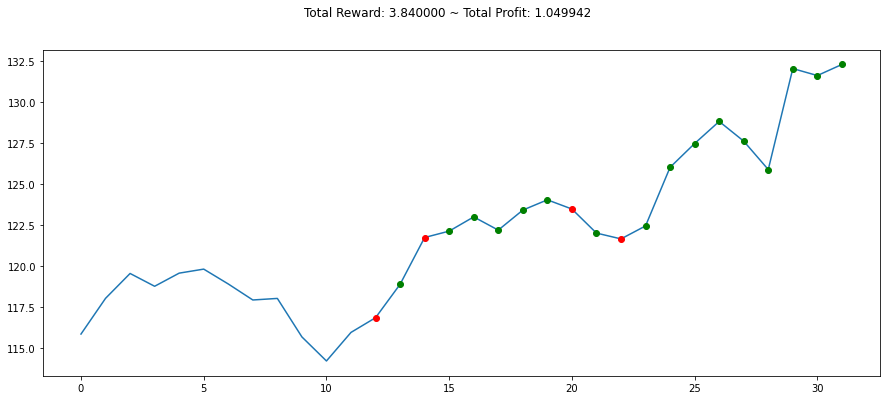

In [78]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show    